# Data Mining - Handin 2 - Graph mining

Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 10--15 in the course.

The handin IS 
* done individually
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Blackboard no later than **April 19th kl. 8.59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **100**. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 28 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 4 points in the last part (Part 4).
Good luck!

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

In [2]:
### BEGIN IMPORTS - DO NOT TOUCH!
import sys
sys.path.append('..')

import random
import scipy.io as sio
import time

import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import csv
from itertools import count


import torch
import torch.optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
### END IMPORTS - DO NOT TOUCH!

In [3]:
from utilities.load_data import load_mnist
import utilities.email as email
import utilities.mnist as mnist

# Part 1: Theoretical questions
We will start out with theory questions. 
These questions are theoretical; as such, they **should be answered without implementation**. 
In particular, you are allowed to verify your answer experimentally, but the motivation you provide should be only in text and theoretically grounded. 

## Task 1.1 Random walks and PageRank
 
Recall that the PageRank is defined as $\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p}$, where $\mathbf{r}$ is the PageRank vector, $\alpha$ is the restart probability, $\mathbf{M} = A\Delta^{-1}$, and $\mathbf{p}$ is the restart (or personalization) vector. 


### Task 1.1.1 (4 points)
What is the PageRank of a complete **bipartite** graph with 3 nodes on one side and 4 on the other side and $\alpha=1$? 

<span style='color: green'>**\[Motivate\]**</span> your answer without showing the exact computation. 

*******************
The pagerank algorithm cannot converge for a complete bipartite graph when $\alpha=1$. This is because iteratively we will keep swaping from one group to another with exactly the same results for each pair of iterations.

**`[i] Iteration 0:`**

<span style="color:orange">**0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;**</span>

**`[i] Iteration 1:`**

<span style="color:purple">**0.107&nbsp;&nbsp;&nbsp;&nbsp;0.107&nbsp;&nbsp;&nbsp;&nbsp;0.107&nbsp;&nbsp;&nbsp;&nbsp;0.107&nbsp;&nbsp;&nbsp;&nbsp;0.190&nbsp;&nbsp;&nbsp;&nbsp;0.190&nbsp;&nbsp;&nbsp;&nbsp;0.190&nbsp;&nbsp;&nbsp;&nbsp;**</span>

**`[i] Iteration 2:`**

<span style="color:orange">**0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;**</span>

**`[i] Iteration 3:`**

<span style="color:purple">**0.107&nbsp;&nbsp;&nbsp;&nbsp;0.107&nbsp;&nbsp;&nbsp;&nbsp;0.107&nbsp;&nbsp;&nbsp;&nbsp;0.107&nbsp;&nbsp;&nbsp;&nbsp;0.190&nbsp;&nbsp;&nbsp;&nbsp;0.190&nbsp;&nbsp;&nbsp;&nbsp;0.190&nbsp;&nbsp;&nbsp;&nbsp;**</span>

**`[i] Iteration 4:`**

<span style="color:orange">**0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;0.143&nbsp;&nbsp;&nbsp;&nbsp;**</span>
******************

### Task 1.1.2 (4 points)
Look at this graph below (run the code)

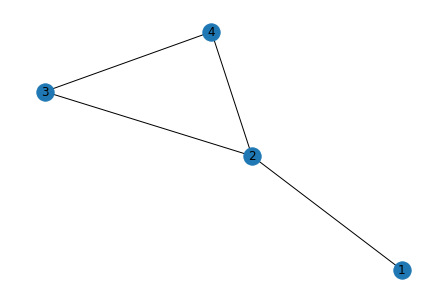

In [4]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3), (2,4), (3,4)])
nx.draw(G, with_labels=True)

It is a complete subgraph (i.e a clique) with a dangling node (number 1 in the image).

<span style='color: green'>**\[Compute by hand\]**</span> the PageRank (i.e. $\alpha=1$) for the graph. If you use the Power Iteration method shows only the first step and the last (i.e., convergence). 

**Hint:** If you solve the linear system note that node 3 and node 4 are symmetric, hence the PageRank for those nodes is ...

*******************
As node 3 & 4 are symmetric, their pagerank will be the same in every iteration of the pagerank algorithm.

The first iteration of pagerank is $r^{(1)} = M r^{(0)}$
which is:

$$
\overset{M}{\begin{pmatrix}
0 & 1/3 & 0 & 0\\ 
1 & 0 & 1/2 & 1/2\\ 
0 & 1/3 & 0 & 1/2\\ 
0 & 1/3 & 1/2 & 0
\end{pmatrix}}\cdot \overset{r^{\left ( 0 \right )}}{\begin{pmatrix}
1/4\\ 
1/4\\ 
1/4\\ 
1/4
\end{pmatrix}}
= 
\overset{r^{\left ( 1 \right )}}{\begin{pmatrix}
1/12\\ 
3/1\\ 
5/24\\ 
5/24
\end{pmatrix}}
$$

Convergence is reached obtaining this final r vector at iteration 19:

$$
\begin{pmatrix}
0.1248\\ 
0.2754\\ 
0.2499\\ 
0.2499
\end{pmatrix}
\approx 
\begin{pmatrix}
1/8\\ 
3/8\\ 
1/4\\ 
1/4
\end{pmatrix}
$$


******************

### Task 1.1.3 (2 points)
<span style='color: green'>**\[Motivate\]**</span> what happens to the PageRank when you increase by 1 node the size of the clique in the graph in **1.1.2**. Isthe PageRank of the nodes __not__ connected with the isolated node higher or lower than before? Is the PageRank of the isolated node higher or lower? 
_You do not need to show any computation but to reason on why and if the value changes with respect to the Task 1.1.2._

*******************
The pagerank of the isolated node will decrease as, not only a new node joins the network (which will have a probability >0 to be reached making every other node score decrease), but is joining to a clique subgraph which will make much lower the probability to end up in the isolated node connected to just one node of the clique subgraph.

The pagerank of the nodes not connected to the isolated one will also decrease but just by a very litle ammount. This is because there will be a new symmetric node (like 3 & 4) and the probabilities to reach the new node will evenly distribute between those.
******************

### Task 1.1.4 (5 points)
Assume now the graph in **1.1.2** has $n$ nodes (where $n$ is a variable) and a clique with $n-1$ nodes. 
What is the PageRank of  the $n-2$ nodes in the clique that are not connected to the isolated node? Provide a formula which depends on $n$.

To solve the linear system you can use Wolfram Alpha and provide directly the answer (use the function ```solve eq1, eq2 for x,y``` to solve the system). It is easy to verify if you are right as the solution with $n=4$ is exactly the PageRank of Task 1.1.2.

**Hint**: If you have solved the system before you will notice that you do not need $n$ equations as you only have 3 types of nodes! 

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.1.5 (2 points)

Assume you have embedded the graph in **1.1.2** with a __Linear Embedding__ using unormalized Laplacian matrix of the graph as the similarity matrix. How do you expect the embeddings to be if the embedding dimension is $d = 1$? 

* [ ] Nodes 1, 2, 3, 4 will be placed in the corners of a hypercube
* [ ] Nodes 2,3 will have the same embedding while 1,4 will be far from each other.
* [ ] Nodes 3,4 will have very close embeddings.
* [ ] Nodes 3,4 will be very far apart.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 1.2: Spectral Properties of the Graph Laplacian
 <span style='color: green'>**\[Prove\]**</span> **the following properties:**
Note that this an exercise from the TA session on "Spectral Graph Theory". You will also be given points for each of the properties that you prove, rather than points for the exercise as a whole.

### Task 1.2.1 (2 points)
$\lambda_0 = 0$ for all graphs
*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.2 (2 points)

For all the graphs $\sum_{i=0}^{n-1} \lambda_i = n$
*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.3 (2 points)

For all the graphs, $\lambda_1 \leq \frac{n}{n-1}$
*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.4 (2 points)
For all the graphs, $\lambda_{n-1} \geq \frac{n}{n-1}$
*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.5 (3 points)
1. For the complete graph, $\lambda_1, \dots, \lambda_{n-1} = \frac{n}{n-1}$
*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 2: Graphs and Spectral clustering
In this part, you will experiment and reflect on spectral clustering as a technique for partitioning a graph. 

## Task 2.1 $\varepsilon$-neighbourhood graph
### Task 2.1.1 (4 points)

Take the MNIST dataset by running the code below. 

<span style='color: green'>**\[Implement\]**</span> the $\varepsilon$-neighborhood graph, using Eucledian (L2) distance. 

**Note**: Be sure that your constructed graphs does not contain loop edges (edges from i to i for some node i)

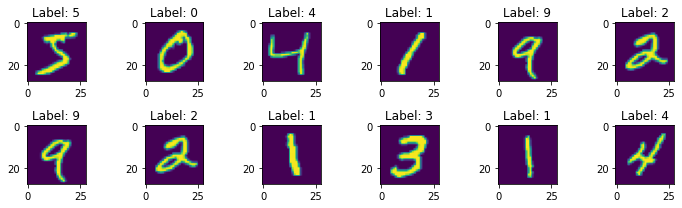

In [6]:
X_reduced = mnist.X_reduced
y_reduced = mnist.y_reduced

X_plot, y_plot, *_ = load_mnist()
fig, ax = plt.subplots(2,6, figsize=(10, 3))
for i in range(2): 
    for j in range(6):
        ax[i, j].imshow(X_plot[i*4 + j])
        ax[i, j].set_title("Label: %d" % y_plot[i*4 + j])
plt.tight_layout()

In [ ]:
# You are allowed to use sklearn if you wish. 
# Be sure that your constructed graphs does not contain loop edges (edges from i to i for some node i)
from sklearn.neighbors import NearestNeighbors 

def nn_graph(data, eps, remove_self=True, directed=False):
    ## YOUR CODE HERE
    
    ## YOUR CODE HERE
    return G

### Task 2.1.2 (2 points)

Try with different epsilons (select a small set of epsilons, e.g., 5-10 values) and plot the graphs. 

<span style='color: green'>**\[Motivate\]**</span> what you observe as epsilon increases. 

In [ ]:
### Plot a few graphs with different epsilon values
eps_values = []
### 

for eps in eps_values: 
    G = nn_graph(X_reduced, eps)
    pos=nx.spring_layout(G)

    fig=plt.figure(figsize=(20,10))
    ax=plt.subplot(121)
    mnist.plot_neighborhood_graph(G, pos, ax)

    ax=plt.subplot(122)
    mnist.plot_img_neighborhood_graph(G, X_reduced, fig, pos, ax)

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Important for the rest of the exercise

Fix the $\varepsilon = 20$ in the rest of the tasks in this part. Use the variables (X_reduced, y_reduced). Print the final graph using the code below. 

In [ ]:
eps = 20
G = nn_graph(X_reduced, eps)
pos=nx.spring_layout(G)

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(121)
mnist.plot_neighborhood_graph(G, pos, ax)

ax=plt.subplot(122)
mnist.plot_img_neighborhood_graph(G, X_reduced, fig, pos, ax)

### Task 2.1.3 (2 points)
Assign to each edge in the $\varepsilon$-neighborhood graph a weight

$$W_{i j}=e^{-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{t}}$$

<span style='color: green'>**\[Implement\]**</span> the function ```weighted_nn_graph``` below that returns the weighted graph given the data matrix in input and the values eps and t, where t is the parameter of the equation above. 

In [ ]:
def weighted_nn_graph(data, eps=20, t=0.1):
    ## YOUR CODE HERE
    
    ## YOUR CODE HERE
    return G

### Task 2.1.4 (2 points)

We now vary $t \in \{100000, 1000, 100, 10, 0.1, 0.0001\}$. Plot the weights as a histogram in order to analyse the results usin the provided code below as a way to do that.

What happens when $t$ is very small, close to $0$, i.e., $t \rightarrow 0$? What happens when $t$ is very large?
Is the behaviour with $t = 0$ expected?

<span style='color: green'>**\[Motivate\]**</span> your answer reasoning on the formula. 

In [ ]:
ts = [100000, 1000, 100, 10, 0.1, 0.0001]
fig, ax = plt.subplots(2,3, figsize=(20, 10))
row = 0

for i, t in enumerate(ts):
    G = weighted_nn_graph(X_reduced, eps=20, t=t)
    ys = []
    
    if i == 3: 
        row += 1
    col = i % 3
    
    for i, d in enumerate(G.edges.data()):
        ys.append(d[2]['weight'])
    plt.hist(ys, bins=100)
    ax[row, col].hist(ys, bins=100)
    ax[row, col].set_title("t: %d" % t)
    
plt.tight_layout()

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 2.2: Spectral clustering

We will now look at spectral clustering and its properties. For this Task we will use a subgraph from [Email-EU-Core](https://snap.stanford.edu/data/email-Eu-core.html).
Run the code below to load the graph and visualize the communities. 

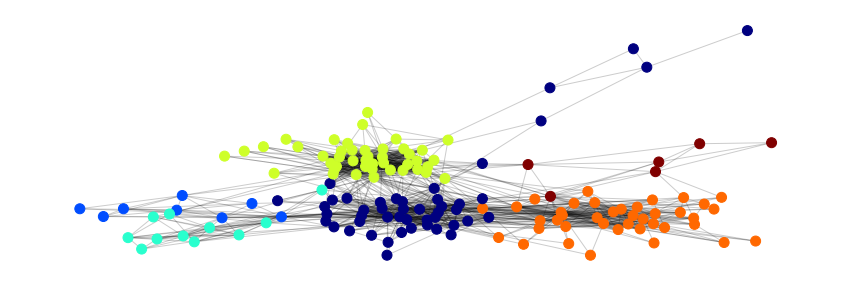

In [7]:
G = email.S_undir
plt.figure(1,figsize=(15,5))
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=email.colors, node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

In [8]:
def graph_eig(L): 
    """
        Takes a graph Laplacian and returns sorted the eigenvalues and vectors.
    """
    lambdas, eigenvectors = np.linalg.eig(L)
    lambdas = np.real(lambdas)
    eigenvectors = np.real(eigenvectors)
    
    order = np.argsort(lambdas)
    lambdas = lambdas[order]
    eigenvectors = eigenvectors[:, order]
    
    return lambdas, eigenvectors

def plot_eigvec(G, vectors_from_eig):
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots(3, 2, figsize=(20, 15))
    ek_ = np.around(vectors_from_eig, decimals=1)
    for k in np.arange(0,6): 
        i, j = k % 3, k % 2
        ncs = ek_[:,k]
        nx.draw(G, ax=ax[i, j], cmap=plt.get_cmap('RdBu'), node_color=ncs, pos=pos, with_labels=True)
        ax[i, j].set_title("k = %i" % k)

### Task 2.2.1 (2 points)
Compute the eigenvectors and eigenvalues (using the provided function) of the Normalized Laplacian and the Random Walk Laplacian of the graph $G$. Plot the spectrum (eigenvalues).

<span style='color: green'>**\[Implement\]**</span> the code to compute the different Laplacians. 

In [9]:
L_norm = None
L_rw = None
## YOUR CODE HERE
L_norm = nx.normalized_laplacian_matrix(G)
L_rw = nx.laplacian_matrix(G)
## YOUR CODE HERE
eigval_norm, eigvec_norm = graph_eig(L_norm)
eigval_rw, eigvec_rw = graph_eig(L_rw)

plt.figure(0)
plt.plot(eigval_norm, 'b-o', label='Spectrum of Normalized Laplacian', )
plt.legend()
plt.figure(1)
plt.plot(eigval_rw, 'b-o', label='Spectrum of the Random Walk Laplacian')
plt.legend()

<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
<class 'networkx.utils.decorators.argmap'> compilation 24:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

### Task 2.2.2 (4 points)
<span style='color: green'>**\[Implement\]**</span> the function ```spect_cluster``` that returns a vector ```y_clust``` in which each entry y_clust\[i\] represents the community assigned to node $i$. The method should be able to handle both the Normalized Laplacian, and the Random Walk Laplacian. You are allowed to use your implementation from the weekly exercises and ```sklearn.cluster.k_means``` for k-means clustering. 

In [ ]:
from sklearn.cluster import k_means
def spect_cluster(G, eig_type="normal", k=5, d=5):
    ## YOUR CODE HERE
    
    ## YOUR CODE HERE
    return y_clust

Use the code below to visualize the communities. 

In [ ]:
pos = nx.spring_layout(G)
def plot_graph(G, clusters):
    plt.figure(1,figsize=(30,15))
    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=clusters, node_size=100, cmap=plt.cm.jet)

    plt.axis('off')
    plt.show()

Run spectral clustering with k=6 and visualize the communities. 

In [ ]:
### YOUR CODE HERE

### Task 2.2.3 (1 point)

Finally, use your implementation of spectral clustering with different Laplacians and different values of $k \in \{2,7\}$ and plot the results using the helper function ```plot_graph```. 

<span style='color: green'>**\[Describe\]**</span> the results you obtain. Especially, what is the difference between the Random Walk and the Normalized Laplacians, if any? How do you explain such differences? Can you detect easily all the ground truth communities? Are some communities not detected? Why do you think that happens? 

In [ ]:
for method in ['normal', 'random']: 
    for k in np.arange(2,8): 
        your_clusters = spect_cluster(G,eig_type=method, k=k)
        plot_graph(G, your_clusters)

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 2.2.4 (4 points)
<span style='color: green'>**\[Implement\]**</span> the modularity. Recall that the definition of modularity for a set of communities $C$ is
$$ 
Q=\frac{1}{2 m} \sum_{c \in C} \sum_{i \in c} \sum_{j \in c}\left(A_{i j}-\frac{d_{i} d_{j}}{2 m}\right) \qquad \qquad (1) 
$$
where $A$ is the adjacency matrix, and $d_i$ is the degree of node $i$

**Note**: Use ```plot_graph``` function in order to see for yourself if maximising modularity leads a better clustering. If you did not succeed with the previous Task you are allowed to use [Scikit Learn Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

In [ ]:
def modularity(G, clustering):
    modularity = 0
    ## YOUR CODE HERE
    
    ## YOUR CODE HERE
    return modularity


# You may want to use plt.plot to plot the modularity for different values of k
plt.plot(ks, mods)

### Task 2.2.5 (2 point)

Compute the modularity of your Spectral Clustering Implementation for different values of $k$. 

<span style='color: green'>**\[Motivate\]**</span> which value maximises the modularity. Is $k=6$ maximizing the modularity? If yes, is this consistent with the ground-truth? If not, is it because of an issue with modularity or with spectral clustering? 

In [ ]:
mods = []
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for k in ks:
    clusters = spect_cluster(G, k=k) ### NOTE: If you do not use your implementation substitute with a call to the sklearn one. 
    mods.append(modularity(G, clusters))

# You may want to use plt.plot to plot the modularity for different values of k
plt.plot(ks, mods)

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 2.2.6 (2 points)

There seems to be a relationship between graph embeddings and spectral clustering, can you guess that? _Hint_: Think to the eigenvectors of the graph's Laplacians.

* [ ] If the embeddings are linear and the similarity is the Laplacian, the embeddings we obtain minimizing the L_2 norm are equivalent to the eigenvectors of the Laplacian. 
* [ ] If the embeddings are random-walk-based embeddings, the eigenvectors of the Ranom Walk Laplacian are related to the embeddings obtained by such methods. 
* [ ] The relationship is just apparent. 
* [ ] If the embeddings are linear and the similarity is the Adjacency matrix, the eigenvectors of the Laplacian are equivalent to the embeddings. 

# Part 3: Link analysis
In this exercise, we will work with PageRank, Random Walks and their relationships with graph properties. 
We will use the most generic definition

$$\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p}$$

with $\mathbf{r}$ the PageRank vector, $\mathbf{M}$ the weighted transition matrix, and $\mathbf{p}$ the personalization vector. 
Additionally, let $n = |V|$, where $V$ is the nodes in the graph above.
Remember that in the case of PageRank the entries of the personalization vector are $p_i = 1/n$ for all $i$.  

The graph we will be using is the same as before, but now in a directed form. Run the code below to see the results.  

In [ ]:
G = email.S_dir.copy()
pos = nx.spring_layout(G)

In [ ]:
def plot_pagerank(G, r, fignum=1, colourmap='viridis'):
    plt.figure(fignum,figsize=(15,5))
    nodes = G.nodes()
    
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    ranks = np.ravel(r)
    max_element = np.max(ranks)
    ranks = [x/max_element for x in ranks]
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes,node_size=100,  node_color=ranks,cmap=plt.get_cmap(colourmap))

    plt.axis('off')
    plt.show()

In [ ]:
import random
plot_pagerank(G, [random.uniform(0,1) for _ in range(G.number_of_nodes())])

## Task 3.1 PageRank

### Task 3.1.1 (1 point)
Print the degree distribution of the graph. You can use NetworkX ```G.degree```. 

<span style='color: green'>**\[Motivate\]**</span> what you notice. Is the graph dense or sparse? Is the degree distribution exponential or linear? Are there many nodes with high degree? 

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.2 (3 points)
Implement the PageRank algorithm. You can use the implementation from the exercises.  

In [ ]:
def pagerank(G, iterations=500, alpha=0.85):
    ## YOUR CODE HERE
    
    ## YOUR CODE HERE
    return r

In [ ]:
r = pagerank(G)
plot_pagerank(G, r, colourmap='autumn')

**YOUR ANSWER**

### Task 3.1.3 (1 point)

Run PageRank on the graph with $\alpha \in \{0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1\}$. If you didn't provide an implementation earlier you can use ```nx.pagerank``` and adapt the code below. 

<span style='color: green'>**\[Describe\]**</span> what happens to the PageRank values. What effect does $\alpha$ have on the distribution of PR values? Does the PageRank in this specific graph always converge? 

*A note on the colourmap: We are using a colourmap whose lightness grows as the values grow. This should help you interpret the results.*

In [ ]:
alphas = [0, 0.15, 0.3, 0.45, 0.6, 0.8, 0.9, 1]
for i, alpha in enumerate(alphas):
    r = pagerank(G, alpha=alpha)
    plot_pagerank(G, r, fignum=i, colourmap="viridis")

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 3.2 Approximate PageRank

### Task 3.2.1 (5 points)

<span style='color: green'>**\[Implement\]**</span>  a different algorithm for computing Personalized PageRank. This algorithm runs a fixed number of iterations and uses the definition of random walks. 
At each step, the algorithm either selects a random neighbor with probability $\alpha$ or returns to the starting node with probability $1-\alpha$. Every time a node is visited a counter on the node is incremented by one. Initially, each counter is 0. The final ppr value is the values in the nodes divided by the number of iterations. 


In [ ]:
import random
def approx_personalized_pagerank(G, node, alpha = 0.85, iterations = 1000): 
    ppr = np.zeros(G.number_of_nodes())
    ### YOUR CODE HERE
    

    ### YOUR CODE HERE
    return ppr

### Task 3.2.2 (3 points)

<span style='color: green'>**\[Implement\]**</span> the code to run the ```approx_personalized_pagerank``` with default $\alpha$ and iterations $\{10, n, 2n, 4n, 100n\}$ where $n$ is the number of nodes in the graph and starting node the node with the highest PageRank computed in Task 3.1.2. Print the top-20 nodes and their respective real (with ```nx.pagerank``` or your pagerank implemented in Task 3.12) and the approximate PPR.

<span style='color: green'>**\[Motivate\]**</span> what do you notice as the number of iterations increase. Why are the values and the top-20 nodes ranked by PPR changing so much? 

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.2.3 (2 points)

<span style='color: green'>**\[Implement\]**</span> and compare the 5 nodes with the highest PPR obtained from ```nx.pagerank(G, alpha=0.85, personalization={node_highest_pagerank: 1})``` and the one obtained by the approximation. 

<span style='color: green'>**\[Describe\]**</span> the differences. Does the iteration affect the results? Is there a relationship between the number of iterations and the results? Is there a relationship between the approximated value of PageRank and the real value? Do you notice anything as the number of iteration increases? 

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
*****************

### Task 3.2.4 (2 points)

Run again the same experiment in Task 3.2.3 but this time use $\alpha = 0.1$. 

<span style='color: green'>**\[Motivate\]**</span> Motivate whether and why you need more or less iterations to predict the 5 nodes with the highest PPR. 

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 3.3 Spam and link farms
We will now study the effect of spam in the network and construct a link farm. In this part, if you want to modify the graph, use a copy of the original graph every time you run your code, so that you do not keep adding modifications.

In [ ]:
G = email.S_dir.copy()

As you construct a link farm, you may want to use the following to plot your results.

In [ ]:
plot_pagerank(YOUR GRAPH MODIFIED WITH A LINK FARM, SOME TRUSTRANK OR PAGERANK, pos=nx.kamada_kawai_layout(G))

### Task 3.3.1 (3 points)
Based on the analysis in the slides, construct a spam farm $s$ on the graph $G$ with $T$ fake nodes. Assume that $s$ manages to get links from node 1. With $\alpha=0.85$, 

<span style='color: green'>**\[Describe\]**</span> how many pages $T$ do you need to add in order to get $s$ being assigned the highest PageRank. 
Provide sufficient theoretical justification. To help your analysis you can initially provide a piece of code that finds $T$ such that the PageRank $\mathbf{r}_s$ is maximizied.

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.3.2 (4 points)
In the above scenario, assume that $T = \frac{1}{5}$ of the nodes in the original graph. As above you can, but you are not obliged to, provide a piece of code to help your analysis. 

<span style='color: green'>**\[Motivate\]**</span> what value of $\alpha$ will maximize the PageRank $\mathbf{r}_s$ of the link farm $s$. Provide sufficient justification for your choice. 

In [ ]:
## YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.3.3 (4 points)

Now we fix both $\alpha = 0.85$ and $T = \frac{1}{5}n$. 

<span style='color: green'>**\[Implement\]**</span>  ```trusted_pagerank``` the method for spam mass estimation.

In [ ]:
def trusted_pagerank(G, trusted_indices, iterations=500, alpha=0.85):
    r = None
    
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return r

### Task 3.3.4 (3 points)

<span style='color: green'>**\[Discuss\]**</span> whether we are able to detect the node $s$, if the trusted set of nodes is a random sample $10\%$ of the nodes in the original graph. 
If not, what could be a viable solution? Which nodes would you rather choose as trusted?

You are not obliged to, but you can write some helper code to reach the answer faster.  

_Hint_: Remember the spam mass formula in the Link Analysis lecture

In [ ]:
### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 4: Graph embeddings
In this final part, we will try a different approach for clustering the data from above. 
The strategy is going to be the following:

1. Use VERSE [[1]](https://arxiv.org/pdf/1803.04742.pdf) to produce embeddings of the nodes in the graph.
2. Use K-Means to cluster the embeddings. Measure and report NMI for the clustering. 

[[1](https://arxiv.org/pdf/1803.04742.pdf)] Tsitsulin, A., Mottin, D., Karras, P. and Müller, E., 2018, April. Verse: Versatile graph embeddings from similarity measures. In Proceedings of the 2018 World Wide Web Conference (pp. 539-548).

In [ ]:
G = email.S_dir.copy()

## Task 4.1.1 (6 points)

<span style='color: green'>**\[Implement\]**</span> the methods below to compute sampling version of VERSE. _Hint:_ it might be a help to look in the original article \[1\] above.

In [ ]:
def sigmoid(x):
    ''' Return the sigmoid function of x 
        x: the input vector
    '''
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return x

def pagerank_matrix(G, alpha = 0.85) :     
    ''' Return the Personalized PageRank matrix of a graph

        Args:
            G: the input graph
            alpha: the dumping factor of  PageRank

        :return The nxn PageRank matrix P
    '''
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return P
    

def update(u, v, Z, C, step_size) :
    '''Update the matrix Z using row-wise gradients of the loss function

       Args:
            u : the first node
            v : the second node
            Z : the embedding matrix
            C : the classification variable used in Noise Contrastive estimation indicating whether the sample is positive or negative
            step_size: step size for gradient descent


       :return nothing, just update rows Z[v,:] and and Z[u,:]
    '''
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    
    
def verse(G, S, d, k = 3, step_size = 0.0025, steps = 10000): 
    ''' Return the sampled version of VERSE

        Args:
            G: the input Graph
            S: the PageRank similarity matrix
            d: dimension of the embedding space
            k: number of negative samples
            step_size: step size for gradient descent
            steps: number of iterations

        :return the embedding matrix nxd
    '''
    n = G.number_of_nodes()
    Z = 1/d*np.random.rand(n,d)

    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return Z

In [ ]:
# This code runs the `verse` algorithm above on G and stores the embeddings to 'verse.npy'
P   = pagerank_matrix(G)
emb = verse(G, P, 128, step_size=0.0025, steps=10_000)
np.save('verse.npy', emb)

### Task 4.1.2 (4 points)

<span style='color: green'>**\[Implement\]**</span> a small piece of code that runs K-means on the embeddings with $k \in [2,7]$ to evaluate the performance compared to Spectral clustering using the NMI as measure. You can use ```sklearn.metrics.normalized_mutual_info_score``` for the NMI and ```sklearn.cluster.KMeans``` for kmeans. In both cases, you can use your own implementation from Handin 1 or the exercises, but it will not give you extra points.  

<span style='color: green'>**\[Describe\]**</span> which of the method performs the best and whether the results show similarities between the two methods

In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 4.2 (6 points)

**This is a hard exercise. Do it for fun or only if you are done with easier questions.**

<span style='color: green'>**\[Implement\]**</span> a new GCN that optimizes for modularity. The loss function takes in input a matrix $C \in \mathbb{R}^{n\times k}$ of embeddings for each of the nodes. 
$C$ represents the community assignment matrix, i.e. each entry $C_{ij}$ contains the probability that node $i$ belong to community $j$. 

The loss function is the following
$$
loss = - Tr(C^\top B C) + l\|C\|_2
$$ 
where $B$ is the modularity matrix that you will also implement, and $l$ is a regularization factor controlling the impact of the $L_2$ regularizer. 
We will implement a two-layer GCN similar to the one implemented in the exercises, but the last layer's activation fucntion is a Softmax. 

In [ ]:
import pykeen

# Adjacency matrix
G     = email.S_undir.copy()
A     = np.array(nx.adj_matrix(G, weight=None).todense())
I     = np.eye(A.shape[0])
A     = A + I # Add self loop

# Degree matrix
### YOUR CODE HERE

# Normalized Laplacian
    
# Create input vectors

### TODO your code here

X = torch.tensor(X, dtype=torch.float, requires_grad=True) # Indicate to pytorch that we need gradients for this variable
As = torch.tensor(A, dtype=torch.float)
L = torch.tensor(L, dtype=torch.float)  # We don't need to learn this so no grad required.

In [ ]:
# Define a GCN
class GCNLayer(nn.Module):
    def __init__(self, L, input_features, output_features, activation=F.relu):
        """
            Inputs:
                L:               The "Laplacian" of the graph, as defined above
                input_features:  The size of the input embedding
                output_features: The size of the output embedding 
                activation:      Activation function sigma
        """
        super().__init__()
        
        ### TODO Your code here

        
        ### TODO Your code here
     
    def forward(self, X):
        ### TODO Your code here

        
        ### TODO Your code here
        return X

Define the modularity matrix and the modularity loss

In [ ]:
def modularity_matrix(A):
    B = None
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return torch.tensor(B, dtype=torch.float)

def modularity_loss(C, B, l = 0.01): 
    ''' Return the modularity loss

        Args:
            C: the node-community affinity matrix
            B: the modularity matrix
            l: the regularization factor
            
        :return the modularity loss as described at the beginning of the exercise
    '''
    loss = 0
    ### YOUR CODE HERE

    
    ### YOUR CODE HERE
    return loss

Compute labels from communities

In [ ]:
### Compute labels from communities
labels = None
### YOUR CODE HERE


### YOUR CODE HERE


Create the model

In [ ]:
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Encode the labels with one-hot encoding
def to_categorical(y):
    """ 1-hot encodes a tensor """
    num_classes = np.unique(y).size
    return np.eye(num_classes, dtype='uint8')[y]

def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

y, classes = encode_label(labels)
y = torch.tensor(y)

# Define convolutional network
in_features, out_features = X.shape[1], classes.size # output features as many as the number of classes
hidden_dim = 16

# Stack two GCN layers as our model
# nn.Sequential is an implicit nn.Module, which uses the layers in given order as the forward pass
gcn = nn.Sequential(
    GCNLayer(L, in_features, hidden_dim),
    GCNLayer(L, hidden_dim, out_features, None),
    nn.Softmax(dim=1)
)
gcn.to(device)

Train the unsupervised model once 

In [ ]:
l = 100
epochs = 2000

def train_model(model, optimizer, X, B, epochs=100, print_every=10, batch_size = 2):
    for epoch in range(epochs+1):
        y_pred = model(X)
        loss = modularity_loss(y_pred, B, l=l)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % print_every == 0:
            print(f'Epoch {epoch:2d}, loss={loss.item():.5f}')

B = modularity_matrix(A)
optimizer = torch.optim.Adam(gcn.parameters(), lr=0.01)
train_model(gcn, optimizer, X, B, epochs=epochs, print_every=100)

Evaluate your model using NMI. Since the initialization is random train the model 10 times and take the average NMI. Assign each node to the community with the highest probability. 
You should obtain an Average $\text{NMI}\approx0.5$.

Plot the last graph with the nodes colored by commnitieis communities using ```plot_graph``` below. 

**Note**: You have to create the model 5 times otherwise you are keeping training the same model's parameters! 

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

def plot_graph(G, y_pred): 
    plt.figure(1,figsize=(15,5))
    pos = nx.spring_layout(G)
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=y_pred, node_size=100, cmap=plt.cm.jet)
    plt.axis('off')
    plt.show()


    
### YOUR CODE HERE 


### YOUR CODE HERE